# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
TRAIN_PATH = "../data/train.parquet"
TEST_PATH = "../data/test.parquet"

### Reduce memory usage (no more float64 default)

In [3]:
def reduce_mem_usage(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
    return df

### Load data

In [4]:
train = pd.read_parquet(TRAIN_PATH)
test = pd.read_parquet(TEST_PATH)
print("Train shape:", train.shape)
print("Test shape:", test.shape)

train = reduce_mem_usage(train)
test = reduce_mem_usage(test)

display(train.head())

Train shape: (525887, 896)
Test shape: (538150, 896)


,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,15.283000,8.425000,176.404999,44.984001,221.389008,0.121263,-0.417690,0.005399,0.125949,0.058359,...,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636,0.562539
2023-03-01 00:01:00,38.590000,2.336000,525.846008,321.950012,847.796021,0.302841,-0.049576,0.356667,0.481087,0.237954,...,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269,0.533686
2023-03-01 00:02:00,0.442000,60.250000,159.227005,136.369003,295.596008,0.167462,-0.291212,0.083138,0.206881,0.101727,...,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901,0.546505
2023-03-01 00:03:00,4.865000,21.016001,335.742004,124.962997,460.704987,0.072944,-0.436590,-0.102483,0.017551,0.007149,...,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534,0.357703
2023-03-01 00:04:00,27.158001,3.451000,98.411003,44.407001,142.817993,0.173820,-0.213489,0.096067,0.215709,0.107133,...,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167,0.362452


In [5]:
### Remove NaNs and inf columns

In [6]:
# print("NaNs in training set:")
# print(train.isna().sum().sort_values(ascending=False).head())

# print("\nInfs in training set:")
# print(np.isinf(train.select_dtypes(include=[np.number])).sum().sort_values(ascending=False).head())

In [7]:
# Save clean version
train.to_parquet("../data/train_clean.parquet")
test.to_parquet("../data/test_clean.parquet")

# Correlation heatmap

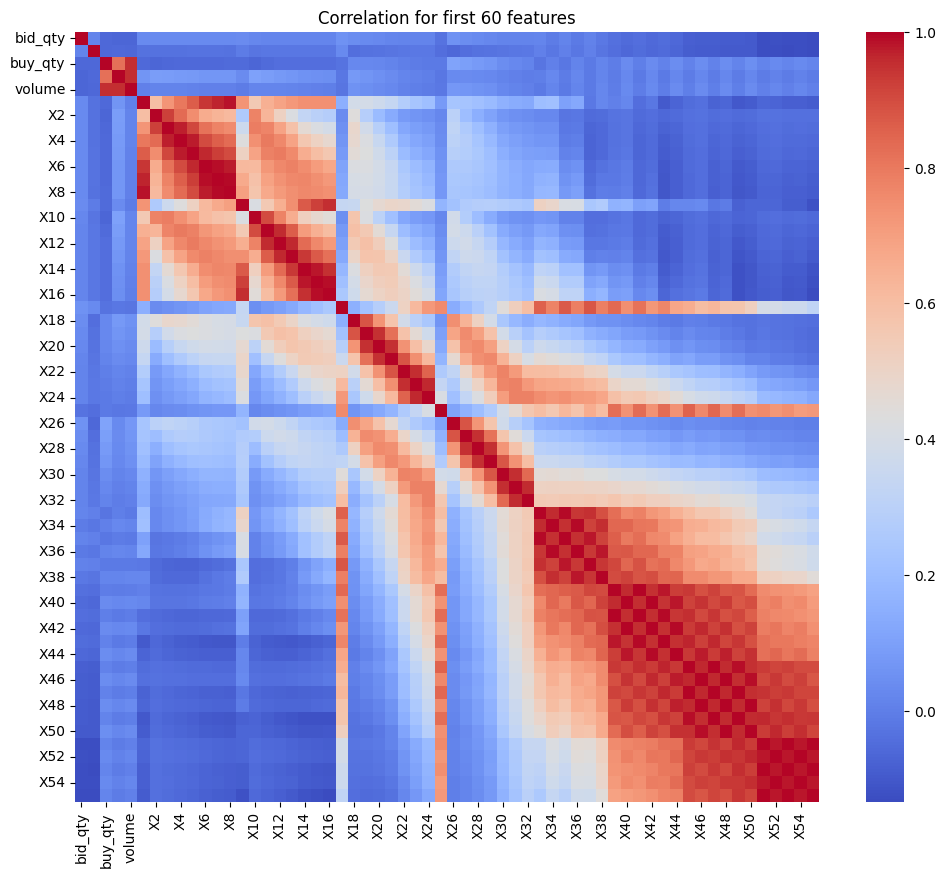

: 

In [ ]:
# Correlation heatmap
X_cols = [c for c in train.columns]
plt.figure(figsize=(12, 10))
sns.heatmap(train[X_cols[:60]].corr(), cmap='coolwarm')
plt.title("Correlation for first 60 features")
plt.show()